In [1]:
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

simplefilter(action="ignore", category=FutureWarning)
sns.set_theme(style="whitegrid")
pd.set_option("precision", 3)
pd.set_option("display.max_columns", 100)


In [2]:
# SECTION: Analyze Performance on Validation Set during Training
classical_models_rfe_results = pd.read_pickle(
    "../results-pickle/classical_models_rfe_results.pkl"
)
neural_network_rfe_results = pd.read_pickle(
    "../results-pickle/neural_network_rfe_results.pkl"
)

complete_rfe_results = pd.concat(
    [
        classical_models_rfe_results,
        neural_network_rfe_results,
    ]
).sort_values("mae_val")

complete_rfe_results.to_pickle("../results-pickle/complete_rfe_results.pkl")


In [3]:
complete_rfe_results


,mae_train,mae_val,r2_train,r2_val,mse_train,mse_val,hyperparam_keys,hyperparam_values,log_y,feature_selector,num_features,selected_features
Ridge,371.591,379.976,0.330,0.362,1.103e+06,1.124e+06,alpha,10,True,RFE,50,"[accommodates, availability_30, bedrooms, cnn_..."
LinearRegression,369.768,380.657,0.333,0.361,1.098e+06,1.123e+06,None,None,True,RFE,50,"[accommodates, availability_30, bedrooms, cnn_..."
HistGradientBoostingRegressor,250.121,382.137,0.764,0.398,3.869e+05,1.054e+06,"[min_samples_leaf, max_leaf_nodes, max_iter, m...","[4, 30, 40, 18, 0.09]",True,RFE,50,"[accommodates, availability_30, bedrooms, cnn_..."
Ridge,376.573,383.011,0.318,0.355,1.123e+06,1.134e+06,alpha,10,True,RFE,25,"[accommodates, availability_30, bedrooms, cnn_..."
HistGradientBoostingRegressor,259.075,383.235,0.740,0.403,4.262e+05,1.048e+06,"[min_samples_leaf, max_leaf_nodes, max_iter, m...","[4, 30, 40, 18, 0.09]",True,RFE,25,"[accommodates, availability_30, bedrooms, cnn_..."
LinearRegression,376.349,383.456,0.320,0.356,1.120e+06,1.131e+06,None,None,True,RFE,25,"[accommodates, availability_30, bedrooms, cnn_..."
Ridge,387.636,392.211,0.302,0.335,1.149e+06,1.161e+06,alpha,110,True,RFE,10,"[accommodates, availability_30, bedrooms, cnn_..."
LinearRegression,386.045,392.397,0.315,0.342,1.128e+06,1.144e+06,None,None,True,RFE,10,"[accommodates, availability_30, bedrooms, cnn_..."
HistGradientBoostingRegressor,347.008,396.800,0.509,0.358,8.060e+05,1.098e+06,"[min_samples_leaf, max_leaf_nodes, max_iter, m...","[6, 15, 40, 24, 0.06999999999999999]",True,RFE,10,"[accommodates, availability_30, bedrooms, cnn_..."
RandomForestRegressor,385.401,409.478,0.390,0.331,1.003e+06,1.180e+06,"[n_estimators, min_samples_leaf, max_depth]","[6, 7, 4]",True,RFE,25,"[accommodates, availability_30, bedrooms, cnn_..."


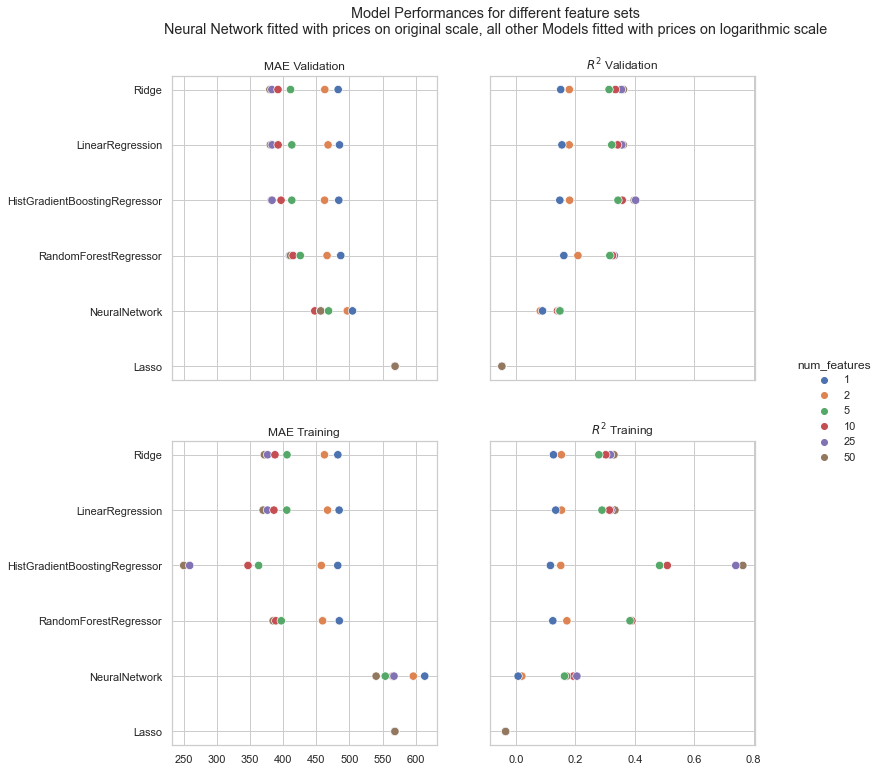

In [4]:
plot_data = complete_rfe_results.astype({"num_features": "category"})

# sharex="col", sharey="row" is amazing :)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharex="col", sharey=True)
ax1, ax2, ax3, ax4 = axes.flat

sns.scatterplot(
    data=plot_data,
    x="mae_val",
    y=plot_data.index,
    hue="num_features",
    markers=["s", "o"],
    s=70,
    ax=ax1,
).set(title="MAE Validation", xlabel="")

sns.scatterplot(
    data=plot_data,
    x="mae_train",
    y=plot_data.index,
    hue="num_features",
    markers=["s", "o"],
    s=70,
    ax=ax3,
    legend=False,
).set(title="MAE Training", xlabel="")

sns.scatterplot(
    data=plot_data,
    x="r2_val",
    y=plot_data.index,
    hue="num_features",
    markers=["s", "o"],
    s=70,
    ax=ax2,
    legend=False,
).set(title=r"$R^2$ Validation", xlabel="")

sns.scatterplot(
    data=plot_data,
    x="r2_train",
    y=plot_data.index,
    hue="num_features",
    markers=["s", "o"],
    s=70,
    ax=ax4,
    legend=False,
).set(title=r"$R^2$ Training", xlabel="")

fig.suptitle(
    "Model Performances for different feature sets\n"
    "Neural Network fitted with prices on original scale, all other Models fitted with prices on logarithmic scale"
)
fig.subplots_adjust(right=0.8, top=0.9)

sns.move_legend(obj=ax1, loc="center", bbox_to_anchor=(2.5, -0.1), frameon=False)

plt.show()
